In [14]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'ee9c0f1d-df93-4fd7-8fb7-f054f87da9e5',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2023-04-07T02:35:27.024Z', 'error_code': 0, 'error_message': None, 'elapsed': 47, 'credit_count': 1, 'notice': None, 'total_count': 9100}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10142, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [15]:
type(data)

dict

In [20]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [21]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

C:\Users\rahul\AppData\Local\Temp\ipykernel_7112\644439384.py:2: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10142,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.933932e+07,1.933932e+07,False,NaN,1,NaN,NaN,None,2023-04-07T02:34:00.000Z,27939.229944,1.319208e+10,-17.5347,-0.484620,-0.483803,-0.768773,25.824048,21.601439,64.833188,5.403258e+11,45.7214,5.867238e+11,None,2023-04-07T02:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-07 02:57:02.334770
1,1027,Ethereum,ETH,ethereum,6699,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.204578e+08,1.204578e+08,False,NaN,2,NaN,NaN,None,2023-04-07T02:34:00.000Z,1868.164283,7.935862e+09,-15.9195,-0.570570,-1.565153,3.613373,19.489879,14.502496,47.373081,2.250349e+11,19.0196,2.250349e+11,None,2023-04-07T02:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-07 02:57:02.334770
2,825,Tether,USDT,tether,50780,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.019539e+10,8.309174e+10,False,NaN,3,NaN,NaN,None,2023-04-07T02:34:00.000Z,1.000192,2.269410e+10,-18.2472,-0.008995,0.003065,0.003320,0.019006,-0.004787,0.043852,8.021078e+10,6.7820,8.310768e+10,None,2023-04-07T02:34:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-07 02:57:02.334770
3,1839,BNB,BNB,bnb,1242,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.578872e+08,1.578872e+08,False,NaN,4,NaN,NaN,None,2023-04-07T02:34:00.000Z,311.575025,5.224676e+08,-8.9832,-0.316494,-0.431313,-1.737120,7.609926,-4.627682,19.008492,4.919369e+10,4.1577,4.919369e+10,None,2023-04-07T02:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-07 02:57:02.334770
4,3408,USD Coin,USDC,usd-coin,11473,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.276106e+10,3.276106e+10,False,NaN,5,NaN,NaN,None,2023-04-07T02:34:00.000Z,0.999642,3.687216e+09,-8.4267,-0.005868,-0.012575,-0.025142,-0.038545,-0.014556,-0.035726,3.274934e+10,2.7690,3.274934e+10,None,2023-04-07T02:34:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-07 02:57:02.334770
5,52,XRP,XRP,xrp,927,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.168847e+10,9.998901e+10,False,NaN,6,NaN,NaN,None,2023-04-07T02:34:00.000Z,0.500421,9.869747e+08,-30.4910,-0.560780,-0.416681,-5.949288,32.552271,25.208063,45.193689,2.586600e+10,2.1861,5.004211e+10,None,2023-04-07T02:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-07 02:57:02.334770
6,2010,Cardano,ADA,cardano,762,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.475447e+10,3.566069e+10,False,NaN,7,NaN,NaN,None,2023-04-07T02:34:00.000Z,0.381166,2.527148e+08,-14.2026,-0.683739,-2.039755,0.686846,15.686441,-3.707321,37.421894,1.324721e+10,1.1201,1.715246e+10,None,2023-04-07T02:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-07 02:57:02.334770
7,74,Dogecoin,DOGE,dogecoin,680,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.388345e+11,1.388345e+11,False,NaN,8,NaN,NaN,None,2023-04-07T02:34:00.000Z,0.085187,1.342088e+09,-8.3132,-0.875896,-7.044925,13.916792,15.365502,-7.357123,17.436617,1.182685e+10,0.9996,1.182685e+10,None,2023-04-07T02:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-07 02:57:02.334770
8,3890,Polygon,MATIC,polygon,648,2019-04-28T00:00:00.000Z,"[platform, enterprise-solutions, zero-knowle

In [ ]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'ee9c0f1d-df93-4fd7-8fb7-f054f87da9e5',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df = df.concat(df2)

In [24]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

{'status': {'timestamp': '2023-04-07T03:03:15.274Z', 'error_code': 0, 'error_message': None, 'elapsed': 72, 'credit_count': 1, 'notice': None, 'total_count': 9100}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10142, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

C:\Users\rahul\AppData\Local\Temp\ipykernel_7112\3087484226.py:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
C:\Users\rahul\AppData\Local\Temp\ipykernel_7112\3087484226.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


{'status': {'timestamp': '2023-04-07T03:04:16.231Z', 'error_code': 0, 'error_message': None, 'elapsed': 33, 'credit_count': 1, 'notice': None, 'total_count': 9100}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10142, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

C:\Users\rahul\AppData\Local\Temp\ipykernel_7112\3087484226.py:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
C:\Users\rahul\AppData\Local\Temp\ipykernel_7112\3087484226.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


{'status': {'timestamp': '2023-04-07T03:05:16.970Z', 'error_code': 0, 'error_message': None, 'elapsed': 34, 'credit_count': 1, 'notice': None, 'total_count': 9100}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10142, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

C:\Users\rahul\AppData\Local\Temp\ipykernel_7112\3087484226.py:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
C:\Users\rahul\AppData\Local\Temp\ipykernel_7112\3087484226.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


KeyboardInterrupt: 

In [25]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,10142,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.933932e+07,1.933932e+07,False,NaN,1,NaN,NaN,None,2023-04-07T02:34:00.000Z,27939.229944,1.319208e+10,-17.5347,-0.484620,-0.483803,-0.768773,25.824048,21.601439,64.833188,5.403258e+11,45.7214,5.867238e+11,None,2023-04-07T02:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-07 02:57:02.334770,NaT
1,1027,Ethereum,ETH,ethereum,6699,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.204578e+08,1.204578e+08,False,NaN,2,NaN,NaN,None,2023-04-07T02:34:00.000Z,1868.164283,7.935862e+09,-15.9195,-0.570570,-1.565153,3.613373,19.489879,14.502496,47.373081,2.250349e+11,19.0196,2.250349e+11,None,2023-04-07T02:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-07 02:57:02.334770,NaT
2,825,Tether,USDT,tether,50780,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.019539e+10,8.309174e+10,False,NaN,3,NaN,NaN,None,2023-04-07T02:34:00.000Z,1.000192,2.269410e+10,-18.2472,-0.008995,0.003065,0.003320,0.019006,-0.004787,0.043852,8.021078e+10,6.7820,8.310768e+10,None,2023-04-07T02:34:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-07 02:57:02.334770,NaT
3,1839,BNB,BNB,bnb,1242,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.578872e+08,1.578872e+08,False,NaN,4,NaN,NaN,None,2023-04-07T02:34:00.000Z,311.575025,5.224676e+08,-8.9832,-0.316494,-0.431313,-1.737120,7.609926,-4.627682,19.008492,4.919369e+10,4.1577,4.919369e+10,None,2023-04-07T02:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-07 02:57:02.334770,NaT
4,3408,USD Coin,USDC,usd-coin,11473,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.276106e+10,3.276106e+10,False,NaN,5,NaN,NaN,None,2023-04-07T02:34:00.000Z,0.999642,3.687216e+09,-8.4267,-0.005868,-0.012575,-0.025142,-0.038545,-0.014556,-0.035726,3.274934e+10,2.7690,3.274934e+10,None,2023-04-07T02:34:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-07 02:57:02.334770,NaT
5,52,XRP,XRP,xrp,927,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.168847e+10,9.998901e+10,False,NaN,6,NaN,NaN,None,2023-04-07T02:34:00.000Z,0.500421,9.869747e+08,-30.4910,-0.560780,-0.416681,-5.949288,32.552271,25.208063,45.193689,2.586600e+10,2.1861,5.004211e+10,None,2023-04-07T02:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-07 02:57:02.334770,NaT
6,2010,Cardano,ADA,cardano,762,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.475447e+10,3.566069e+10,False,NaN,7,NaN,NaN,None,2023-04-07T02:34:00.000Z,0.381166,2.527148e+08,-14.2026,-0.683739,-2.039755,0.686846,15.686441,-3.707321,37.421894,1.324721e+10,1.1201,1.715246e+10,None,2023-04-07T02:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-07 02:57:02.334770,NaT
7,74,Dogecoin,DOGE,dogecoin,680,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.388345e+11,1.388345e+11,False,NaN,8,NaN,NaN,None,2023-04-07T02:34:00.000Z,0.085187,1.342088e+09,-8.3132,-0.875896,-7.044925,13.916792,15.365502,-7.357123,17.436617,1.182685e+10,0.9996,1.182685e+10,None,2023-04-07T02:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-07 02:57:02.334770,NaT
8,3890,Polygon,MATIC,polygon,648,2019-04-28T00:00:00.000Z,"[p

In [26]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [27]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,10142,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19339325.00000,19339325.00000,False,NaN,1,NaN,NaN,None,2023-04-07T02:34:00.000Z,27939.22994,13192084429.67825,-17.53470,-0.48462,-0.48380,-0.76877,25.82405,21.60144,64.83319,540325848145.42737,45.72140,586723828833.42004,None,2023-04-07T02:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-07 02:57:02.334770,NaT
1,1027,Ethereum,ETH,ethereum,6699,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120457776.00000,120457776.00000,False,NaN,2,NaN,NaN,None,2023-04-07T02:34:00.000Z,1868.16428,7935862408.18822,-15.91950,-0.57057,-1.56515,3.61337,19.48988,14.50250,47.37308,225034914694.27423,19.01960,225034914694.26999,None,2023-04-07T02:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-07 02:57:02.334770,NaT
2,825,Tether,USDT,tether,50780,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,80195385809.39134,83091735571.87251,False,NaN,3,NaN,NaN,None,2023-04-07T02:34:00.000Z,1.00019,22694097023.21340,-18.24720,-0.00900,0.00307,0.00332,0.01901,-0.00479,0.04385,80210777745.19159,6.78200,83107683405.36000,None,2023-04-07T02:34:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-07 02:57:02.334770,NaT
3,1839,BNB,BNB,bnb,1242,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,157887156.26166,157887156.26166,False,NaN,4,NaN,NaN,None,2023-04-07T02:34:00.000Z,311.57503,522467563.07225,-8.98320,-0.31649,-0.43131,-1.73712,7.60993,-4.62768,19.00849,49193694674.74799,4.15770,49193694674.75000,None,2023-04-07T02:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-07 02:57:02.334770,NaT
4,3408,USD Coin,USDC,usd-coin,11473,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,32761063186.00019,32761063186.00019,False,NaN,5,NaN,NaN,None,2023-04-07T02:34:00.000Z,0.99964,3687216094.08396,-8.42670,-0.00587,-0.01257,-0.02514,-0.03855,-0.01456,-0.03573,32749337159.38264,2.76900,32749337159.38000,None,2023-04-07T02:34:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-07 02:57:02.334770,NaT
5,52,XRP,XRP,xrp,927,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,51688470797.00000,99989014677.00000,False,NaN,6,NaN,NaN,None,2023-04-07T02:34:00.000Z,0.50042,986974656.72299,-30.49100,-0.56078,-0.41668,-5.94929,32.55227,25.20806,45.19369,25865998845.17299,2.18610,50042105031.04000,None,2023-04-07T02:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-07 02:57:02.334770,NaT
6,2010,Cardano,ADA,cardano,762,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34754466191.38300,35660688966.54200,False,NaN,7,NaN,NaN,None,2023-04-07T02:34:00.000Z,0.38117,252714847.53988,-14.20260,-0.68374,-2.03975,0.68685,15.68644,-3.70732,37.42189,13247213994.62990,1.12010,17152461110.34000,None,2023-04-07T02:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-07 02:57:02.334770,NaT
7,74,Dogecoin,DOGE,dogecoin,680,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,138834466383.70526,138834466383.70526,False,NaN,8,NaN,NaN,None,2023-04-07T02:34:00.000Z,0.08519,1342087563.06373,-8.31320,-0.87590,-7.04493,13.91679,15.36550,-7.35712,17.43662,11826853189.16812,0.99

In [28]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.17756,-0.03032,-0.43931,26.26999,22.25619,65.36012
Ethereum,-0.15978,-1.05450,3.92454,19.97958,15.17641,47.87398
Tether,-0.01100,0.02435,0.01375,0.02549,0.00159,0.04898
BNB,-0.20659,-0.30442,-1.60836,7.48847,-4.27252,19.08667
USD Coin,-0.01348,0.00804,-0.01967,-0.02637,-0.00505,-0.03510
XRP,-0.37172,-0.23375,-5.79525,32.50179,25.48632,45.41969
Cardano,-0.44166,-1.96083,0.90270,15.67699,-3.29213,37.27457
Dogecoin,-0.63938,-7.11238,13.82160,15.28924,-7.19464,17.47287
Polygon,-0.35807,-1.23629,1.38693,-2.70006,-7.34773,37.57571


In [29]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.17756
             quote.USD.percent_change_24h    -0.03032
             quote.USD.percent_change_7d     -0.43931
             quote.USD.percent_change_30d    26.26999
             quote.USD.percent_change_60d    22.25619
             quote.USD.percent_change_90d    65.36012
Ethereum     quote.USD.percent_change_1h     -0.15978
             quote.USD.percent_change_24h    -1.05450
             quote.USD.percent_change_7d      3.92454
             quote.USD.percent_change_30d    19.97958
             quote.USD.percent_change_60d    15.17641
             quote.USD.percent_change_90d    47.87398
Tether       quote.USD.percent_change_1h     -0.01100
             quote.USD.percent_change_24h     0.02435
             quote.USD.percent_change_7d      0.01375
             quote.USD.percent_change_30d     0.02549
             quote.USD.percent_change_60d     0.00159
             quote.USD.percent_change_90

In [30]:
type(df4)

pandas.core.series.Series

In [31]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.17756
            quote.USD.percent_change_24h  -0.03032
            quote.USD.percent_change_7d   -0.43931
            quote.USD.percent_change_30d  26.26999
            quote.USD.percent_change_60d  22.25619
            quote.USD.percent_change_90d  65.36012
Ethereum    quote.USD.percent_change_1h   -0.15978
            quote.USD.percent_change_24h  -1.05450
            quote.USD.percent_change_7d    3.92454
            quote.USD.percent_change_30d  19.97958
            quote.USD.percent_change_60d  15.17641
            quote.USD.percent_change_90d  47.87398
Tether      quote.USD.percent_change_1h   -0.01100
            quote.USD.percent_change_24h   0.02435
            quote.USD.percent_change_7d    0.01375
            quote.USD.percent_change_30d   0.02549
            quote.USD.percent_change_60d   0.00159
            quote.USD.percent_change_90d   0.04898
BNB         quote.USD.percent_change_1h   -0.20659
            quote.USD.percent_change_24h  -0.30442
            quote.USD.percent_change_7d   -1.60836
            quote.USD.percent_change_30d   7.48847
            quote.USD.percent_change_60d  -4.27252
            quote.USD.percent_change_90d  19.08667
USD Coin    quote.USD.percent_change_1h   -0.01348
            quote.USD.percent_change_24h   0.00804
            quote.USD.percent_change_7d   -0.01967
            quote.USD.percent_change_30d  -0.02637
            quote.USD.percent_change_60d  -0.00505
            quote.USD.percent_change_90d  -0.03510
XRP         quote.USD.percent_change_1h   -0.37172
            quote.USD.percent_change_24h  -0.23375
            quote.USD.percent_change_7d   -5.79525
            quote.USD.percent_change_30d  32.50179
            quote.USD.percent_change_60d  25.48632
            quote.USD.percent_change_90d  45.41969
Cardano     quote.USD.percent_change_1h   -0.44166
            quote.USD.percent_change_24h  -1.96083
            quote.USD.percent_change_7d    0.90270
            quote.USD.percent_change_30d  15.67699
            quote.USD.percent_change_60d  -3.29213
            quote.USD.percent_change_90d  37.27457
Dogecoin    quote.USD.percent_change_1h   -0.63938
            quote.USD.percent_change_24h  -7.11238
            quote.USD.percent_change_7d   13.82160
            quote.USD.percent_change_30d  15.28924
            quote.USD.percent_change_60d  -7.19464
            quote.USD.percent_change_90d  17.47287
Polygon     quote.USD.percent_change_1h   -0.35807
            quote.USD.percent_change_24h  -1.23629
            quote.USD.percent_change_7d    1.38693
            quote.USD.percent_change_30d  -2.70006
            quote.USD.percent_change_60d  -7.34773
            quote.USD.percent_change_90d  37.57571
Solana      quote.USD.percent_change_1h   -0.68492
            quote.USD.percent_change_24h  -1.03922
            quote.USD.percent_change_7d   -0.02403
            quote.USD.percent_change_30d   2.27395
            quote.USD.percent_change_60d -12.34426
            quote.USD.percent_change_90d  54.02042
Polkadot    quote.USD.percent_change_1h   -0.78300
            quote.USD.percent_change_24h  -2.01822
            quote.USD.percent_change_7d    0.50047
            quote.USD.percent_change_30d   6.81232
            quote.USD.percent_change_60d  -6.41504
            quote.USD.percent_change_90d  33.10975
Binance USD quote.USD.percent_change_1h   -0.01292
            quote.USD.percent_change_24h   0.02519
            quote.USD.percent_change_7d    0.00064
            quote.USD.percent_change_30d  -0.05036
            quote.USD.percent_change_60d  -0.01962
            quote.USD.percent_change_90d  -0.04947
Litecoin    quote.USD.percent_change_1h   -0.37302
            quote.USD.percent_change_24h  -1.50388
            quote.USD.percent_change_7d    1.41374
            quote.USD.percent_change_30d   6.05778
            quote.USD.percent_change_60d  -5.39709
            quo

In [32]:
df5.count()

values    90
dtype: int64

In [34]:
#Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe. You can make this more dynamic, but I'm just going to hard code it


index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.reset_index()
df6

# If it only has the index and values try doing reset_index like "df5.reset_index()"

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.17756
1,Bitcoin,quote.USD.percent_change_24h,-0.03032
2,Bitcoin,quote.USD.percent_change_7d,-0.43931
3,Bitcoin,quote.USD.percent_change_30d,26.26999
4,Bitcoin,quote.USD.percent_change_60d,22.25619
5,Bitcoin,quote.USD.percent_change_90d,65.36012
6,Ethereum,quote.USD.percent_change_1h,-0.15978
7,Ethereum,quote.USD.percent_change_24h,-1.05450
8,Ethereum,quote.USD.percent_change_7d,3.92454
9,Ethereum,quote.USD.percent_change_30d,19.97958


In [35]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.17756
1,Bitcoin,quote.USD.percent_change_24h,-0.03032
2,Bitcoin,quote.USD.percent_change_7d,-0.43931
3,Bitcoin,quote.USD.percent_change_30d,26.26999
4,Bitcoin,quote.USD.percent_change_60d,22.25619
5,Bitcoin,quote.USD.percent_change_90d,65.36012
6,Ethereum,quote.USD.percent_change_1h,-0.15978
7,Ethereum,quote.USD.percent_change_24h,-1.05450
8,Ethereum,quote.USD.percent_change_7d,3.92454
9,Ethereum,quote.USD.percent_change_30d,19.97958


In [37]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1,-0.17756
1,Bitcoin,24h,-0.03032
2,Bitcoin,7d,-0.43931
3,Bitcoin,30d,26.26999
4,Bitcoin,60d,22.25619
5,Bitcoin,90d,65.36012
6,Ethereum,1,-0.15978
7,Ethereum,24h,-1.05450
8,Ethereum,7d,3.92454
9,Ethereum,30d,19.97958


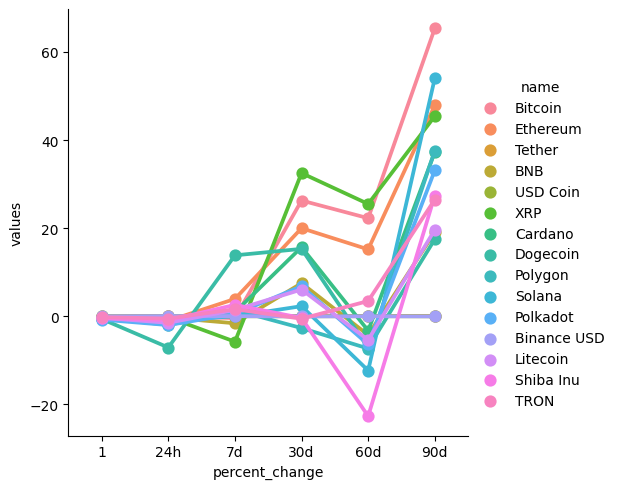

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')